# Burden of Major Depressive Disorder On Working Years

**Challenge:** "As part of this challenge, please calculate a concrete number for productivity lost to depression and include a confidence interval. You can define productivity as you’d like. 
Also, bin your loss of productivity into 3 age groups: 

-younger than 25 <br/>
-25-50<br/>
-50+ <br/>

Be sure to list the resources and assumptions you make. I’d like to get a sense of how you initially approach a data problem, so don’t spend more than 30min on this calculation."


### **Introduction**
According to the National Institute of Mental Health(NIMH), there is approximately 16.2 million people in the United States that have had at least one episode of major depression in 2016[1](https://www.nimh.nih.gov/health/statistics/major-depression.shtml). In the United States, the lifetime prevalence of depression is between 15% and 20% [2](https://reference.medscape.com/features/slideshow/major-depressive-disorder#page=1). The World Health Organization states that the number 1 leading disabilities in the US is neuropsychiatric disorders, with major depression being accounting for the most years lived with disability[3](https://www.nimh.nih.gov/health/statistics/disability/us-leading-categories-of-diseases-disorders.shtml). With these long episodes of depression, the burden of the disease reduces the amount of time working drastically. 

### **Methods**
We can quantify the number of working years lost due to depression through a Years Lived with Disability (YLD) statistic. We are assuming that depression will cause a decrease in number of working years, thus we will not need a hypothesis in this calculation but just to calculate the YLD. This YLD statistic multiplies the "the prevalence of these disorders[depression] by the average level of disability associated with them[depression]"[4](http://apps.who.int/iris/bitstream/handle/10665/254610/WHO-MSD-MER-2017.2-eng.pdf;jsessionid=AFF96E03710F107A72EB1D33B33FF032?sequence=1). It is important to note that this statistic takes in the average of disability/severity and this is also known as the disability weight (DW). The full equation to find YLD is as follows [5](http://www.who.int/healthinfo/global_burden_disease/GlobalDALYmethods_2000_2015.pdf?ua=1):

YLD = l x DW x L

where,<br/>
DW =  disability weight for cause<br/>
l = number of incident cases for cause<br/>
L =  average duration of the case until remission or death (years)<br/>

We will assume that YLD is the maximum number of working years to be lost due to major depression. To calculate YLD, I will bootstrap the average duration of case until remission or death (L) since this can vary significantly. As for the severity, major depressive disorder is chosen and other types of depression are not considered; we have a set severity based on the disability weight(DW). I looked up the disability weight to be 0.685 for year of 2013 [6](http://www.thelancet.com/action/showFullTableImage?tableId=tbl2&pii=S2214109X15000698). The number of incident cases will be 1 since we are looking at the working years lost in one person's life span. To complete the calculation, we need L so we will go ahead and bootstrap for each of the different age groups and few visualizations will be made to compare the age groups.

### **Statistics**
**I. Bootstrap Samples**

Because YLD accounts for morbidity only and not mortality in this case, we will need to create our samples based off of the life expectancy at that year in time. We will not take into account the suicidal cases and thus, we will omit years of life lost (YLL) [5](http://www.who.int/healthinfo/global_burden_disease/GlobalDALYmethods_2000_2015.pdf?ua=1). The life expectancy is 78.74 years in the US [7](https://www.google.com/search?q=average+life+expectancy+in+the+us&oq=average+life+expectancy+in+the+us&aqs=chrome..69i57j0l5.7004j0j4&sourceid=chrome&ie=UTF-8). We can expect the younger age group to have higher numbers based on actual statistics on depression to get our data as close to known statistics as possible. [2](https://reference.medscape.com/features/slideshow/major-depressive-disorder#page=1)

In [26]:
#import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [97]:
# set samples for age bins (young_group = less than 25, middle_group = 25-50, old_group = 50+)
young_ages = range(13,24)
young_group = np.random.choice(young_ages, replace=True, size=100)

middle_ages = range(25, 50)
middle_group = np.random.choice(middle_ages, replace=True, size=45)

old_ages = range(50, 79)
old_group = np.random.choice(old_ages, replace=True, size=10)

In [98]:
# combine age groups so that we can bootstrap this sample next
age_groups = np.concatenate((young_group, middle_group, old_group))

In [99]:
# find mean for each age group (we will use this to compare to our bootstrapped mean later)
age_groups.mean()

26.561290322580646

In [100]:
# bootstrap this sample
bootsamp = np.random.choice(age_groups, replace = True, size= 200)

In [101]:
boot_means = []
for _ in range(1000):
    bootsamp = np.random.choice(age_groups, replace = True, size= 200)
    boot_mean = bootsamp.mean()
    boot_means.append(boot_mean)

** II. Plot Graphs**

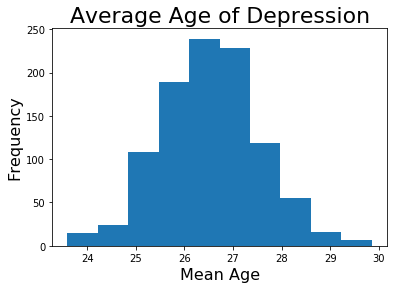

In [102]:
# set title, labels, and plot
plt.title('Average Age of Depression', fontsize= 22)
plt.xlabel('Mean Age', fontsize=16)
plt.ylabel('Frequency', fontsize= 16)
plt.hist(boot_means)

# say the magic words
plt.show();

**III. Find Confidence Intervals**

In [103]:
# set confidence intervals at 95% 
np.percentile(boot_means, 2.5), np.percentile(boot_means, 97.5)

(24.565000000000001, 28.501999999999999)

**IV. Find YLD Statistic**

Our age_groups mean is 26.56, which falls within the 95% confidence interval of 24.57 and 28.50. We are 95% confident that if a person has depression, they would be of age 25 to 29. 
To find average duration of case until death(l), we will take the average age of depression and subtract that from life expectancy. Then we will plug in our numbers into the YLD equation. We already know DW = 0.685 and L= 1. L is 1 because we are only looking at one person's average years lost to depression.

In [105]:
print((79-26.56) * 0.685 * 1)

35.9214


### **Conlcusion**<br/>
We can conclude that the average number of full, healthy life years lost due to major depressive disorder is 35.92, or 36 years. To calculate this statistic, we needed the disabiity weight. A person with major depressive disorder is living 68.5% less optimally than a normal, healthy person. We also needed to determine average duration of depression until death. We took into account what the real numbers are in each age group with depression. Most depressed people fall into the age group 18-25 so we chose a greater proportion of young adults in our "age_groups" sample. Then we bootstrapped our data, plotted a histogram, and found the confidence intervals. We can see that our age_groups mean falls into our 95% confidence interval and thus, our histogram as well.  

It is worth noting some limitations to my calculations. My original plan for calculating the working years lost to depression was to download a data set on depression from online database such as WHO or NIMH but the public data sets do not contain depression. Also, I do not have access to view the full database for data sets that do contain depression. So, the numbers I used are made up. 

Assumptions I made is that as long as major depressive disorder is present, there is a loss of working years. So we are calculating how many average years of depression does a person have in their lifetime. I also did not take into account suicidal cases. There is no opportunity to work once deceased. I also assumed that the earliest onset of depression a person can have is 13. This is not true but there is a small number of people with major depressive disorder under 13 so I omitted them. That is why young_ages range is 13-24 above. 

To conclude, there are other ways of determining working years lost. Norway's method of determining working years lost is through disability benefits offered through employers. Norway's retirement age is at 67 and most disability benefits(DB) are awarded a few years before retirement age. Another difference between Norway's study and mine is that DB are awarded only to those working full-time and between the years 2001 to 2003. From this time period, there was a total of "386,826 lost working years, equivalent to 33.8% of all lost working years, with an average of 20.9." [8](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3419710/) There are different ways of calculating working years lost.

### **References:**

1. Unauthored. (2016). *Prevalence of Major Depressive Episode Among Adults* National Institute of Mental Health. Retrieved from: https://www.nimh.nih.gov/health/statistics/major-depression.shtml
2. Preda, A. (2015, Oct 7). *Major Depressive Disorder: Disabling and Dangerous* MedScape. Retrieved from: https://reference.medscape.com/features/slideshow/major-depressive-disorder#page=1
3. Unauthored. (2010). *U.S. Leading Categories of Diseases/Disorders.* National Institute of Mental Health. Retrieved from: https://www.nimh.nih.gov/health/statistics/disability/us-leading-categories-of-diseases-disorders.shtml
4. Unauthored. (2017). *Depression and Other Common Mental Disorders* World Health Organization. Retrieved from: http://apps.who.int/iris/bitstream/handle/10665/254610/WHO-MSD-MER-2017.2-eng.pdf;jsessionid=AFF96E03710F107A72EB1D33B33FF032?sequence=1
5. Unauthored. (2017). *WHO methods and data sources for global burden of disease estimates 2000-2015* World Health Organization. Retrieved from: http://www.who.int/healthinfo/global_burden_disease/GlobalDALYmethods_2000_2015.pdf?ua=1
6. Salomon, Joshua A et al. (2013). *Disability weights for the Global Burden of Disease 2013 study* The Lancet Global Health. Volume 3 , Issue 11 , e712 - e723. Retrieved from: http://www.thelancet.com/action/showFullTableImage?tableId=tbl2&pii=S2214109X15000698
7. Google Public Data. Retrieved from: https://www.google.com/search?q=united+states+of+america+life+expectancy&stick=H4sIAAAAAAAAAOPgUeLUz9U3sEw2LzfQ0s9OttLPyU9OLMnMz9MvLgHSxSWZyYk58UWp6UAhq5zMtNT41IqC1OSSxLzkyi5GGy6EdiHStVtzcYC0G8cbp5Cv27y4OJlk3QAfCaal-QAAAA&sa=X&ved=0ahUKEwi2l8emgKraAhUqxoMKHQlJAL4Qth8ILTAB
8. Knudsen, A. K., Øverland, S., Hotopf, M., & Mykletun, A. (2012). *Lost Working Years Due to Mental Disorders: An Analysis of the Norwegian Disability Pension Registry.* PLoS ONE, 7(8), e42567. http://doi.org/10.1371/journal.pone.0042567